AVERAGE TEMPERATURE DATASET - ANALYSIS

Import data and convert the index to datetime format

In [1]:
import pandas as pd

df = pd.read_csv('temp_data.csv', skiprows=4)
df.index = pd.to_datetime(df['Date'], format='%Y%m')
df.drop(columns=['Date'], inplace=True)


df.head()

,Value,Anomaly
Date,,
1938-04-01,57.3,0.8
1938-05-01,65.6,-0.8
1938-06-01,74.3,-1.4
1938-07-01,81.3,1.5
1938-08-01,82.0,4.0


Locate missing values and replace them with nan

In [2]:
import numpy as np

df.replace(-99, np.nan, inplace=True)
df.head()


,Value,Anomaly
Date,,
1938-04-01,57.3,0.8
1938-05-01,65.6,-0.8
1938-06-01,74.3,-1.4
1938-07-01,81.3,1.5
1938-08-01,82.0,4.0


Use the interpolate function to put a value in the Nan’s place

In [3]:
df_interpolated = df.interpolate(method='linear', axis=0)
df_interpolated

,Value,Anomaly
Date,,
1938-04-01,57.3,0.8
1938-05-01,65.6,-0.8
1938-06-01,74.3,-1.4
1938-07-01,81.3,1.5
1938-08-01,82.0,4.0
...,...,...
2023-09-01,74.2,4.0
2023-10-01,61.2,2.1
2023-11-01,49.6,4.4


Plot the average temperature time series, the corresponding histogram, and kernel density plot.

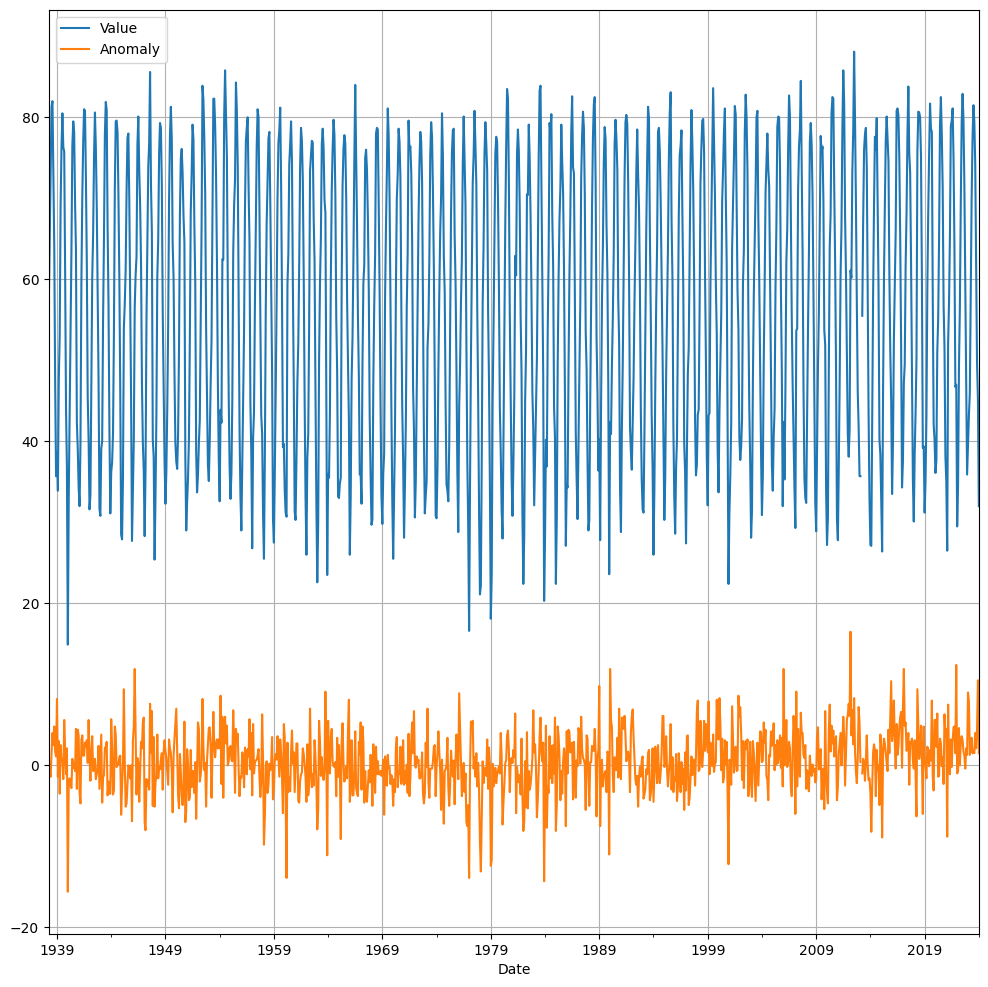

In [4]:
import matplotlib.pyplot as plt

df.plot(figsize=(12, 12))
plt.grid('True')
plt.legend(loc='upper left')
plt.show()


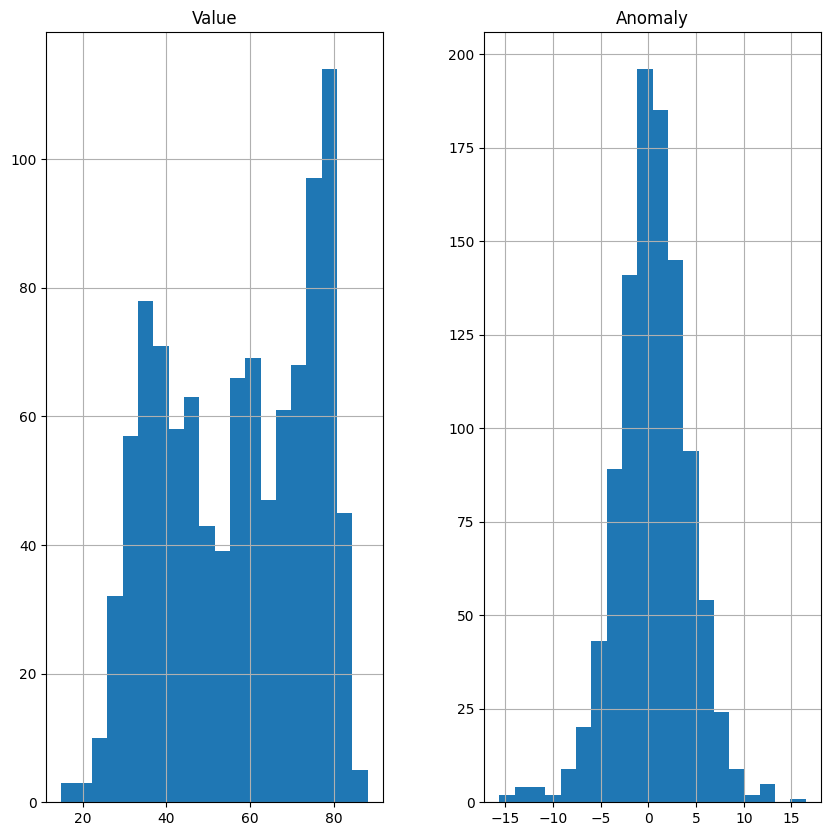

In [21]:
df.hist(column=['Value', 'Anomaly'], bins=20, figsize=(10, 10), grid=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

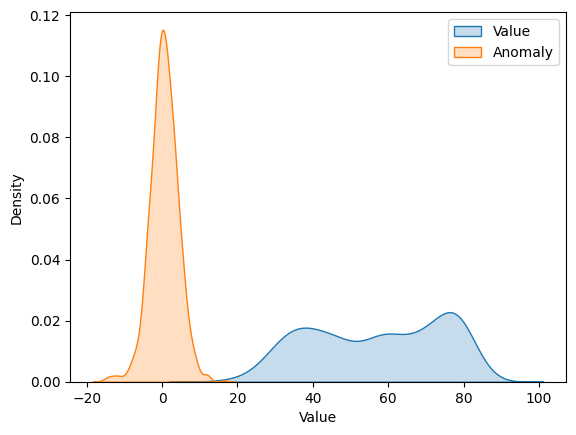

<Figure size 1000x1000 with 0 Axes>

In [5]:
import seaborn as sns

sns.kdeplot(data=df['Value'], label='Value', fill=True)
sns.kdeplot(data=df['Anomaly'], label='Anomaly', fill=True)
plt.legend()
plt.figure(figsize=(10, 10))

Generate descriptive statistics

In [10]:
df.describe()

,Value,Anomaly
count,1029.000000,1029.000000
mean,56.857434,0.489213
std,17.497911,3.765883
min,14.900000,-15.600000
25%,40.800000,-1.600000
50%,58.500000,0.500000
75%,73.600000,2.900000
max,88.100000,16.500000


Four-column table from NOOA website

In [13]:
rank_values = df['Value'].rank()
normalized_rank_values = ((rank_values - rank_values.min()) / (rank_values.max() - rank_values.min())) * 83 + 1
rounded_normalized_ranks = normalized_rank_values.round()

new_data = {
        'Avg. Temp': round(df['Value'], 1),
        'Rank': rounded_normalized_ranks,
        'Anomaly': df['Anomaly']
       }
new_df = pd.DataFrame(new_data)
new_df.head()

,Avg. Temp,Rank,Anomaly
Date,,,
1938-04-01,57.3,41.0,0.8
1938-05-01,65.6,52.0,-0.8
1938-06-01,74.3,64.0,-1.4
1938-07-01,81.3,81.0,1.5
1938-08-01,82.0,82.0,4.0


In [14]:
# Table sorted by rank ascending

sorted_asc_df = new_df.sort_values(by='Rank')
sorted_asc_df.head()

,Avg. Temp,Rank,Anomaly
Date,,,
1940-01-01,14.9,1.0,-15.6
1978-01-01,21.1,1.0,-9.4
1978-02-01,22.2,1.0,-13.1
1979-01-01,18.1,1.0,-12.4
1983-12-01,20.3,1.0,-14.3


In [15]:
# Table sorted by rank descending

sorted_desc_df = new_df.sort_values(by='Rank', ascending=False)
sorted_desc_df.head()

,Avg. Temp,Rank,Anomaly
Date,,,
2011-07-01,85.8,84.0,6.0
1955-07-01,84.3,84.0,4.5
2012-07-01,88.1,84.0,8.3
2007-08-01,84.5,84.0,6.5
1966-07-01,84.0,84.0,4.2
